# day 17

https://adventofcode.com/2018/day/17

In [3]:
import os

import eri.logging as logging

In [4]:
FNAME = os.path.join('data', 'day17.txt')

LOGGER = logging.getLogger('day17')
logging.configure()

## part 1

### problem statement:

> You arrive in the year 18. If it weren't for the coat you got in 1018, you would be very cold: the North Pole base hasn't even been constructed.
> 
> Rather, it hasn't been constructed yet. The Elves are making a little progress, but there's not a lot of liquid water in this climate, so they're getting very dehydrated. Maybe there's more underground?
> 
> You scan a two-dimensional vertical slice of the ground nearby and discover that it is mostly sand with veins of clay. The scan only provides data with a granularity of square meters, but it should be good enough to determine how much water is trapped there. In the scan, x represents the distance to the right, and y represents the distance down. There is also a spring of water near the surface at x=500, y=0. The scan identifies which square meters are clay (your puzzle input).
> 
> For example, suppose your scan shows the following veins of clay:
> 
>     x=495, y=2..7
>     y=7, x=495..501
>     x=501, y=3..7
>     x=498, y=2..4
>     x=506, y=1..2
>     x=498, y=10..13
>     x=504, y=10..13
>     y=13, x=498..504
> 
> Rendering clay as #, sand as ., and the water spring as +, and with x increasing to the right and y increasing downward, this becomes:
> 
>        44444455555555
>        99999900000000
>        45678901234567
>      0 ......+.......
>      1 ............#.
>      2 .#..#.......#.
>      3 .#..#..#......
>      4 .#..#..#......
>      5 .#.....#......
>      6 .#.....#......
>      7 .#######......
>      8 ..............
>      9 ..............
>     10 ....#.....#...
>     11 ....#.....#...
>     12 ....#.....#...
>     13 ....#######...
> 
> The spring of water will produce water forever. Water can move through sand, but is blocked by clay. Water always moves down when possible, and spreads to the left and right otherwise, filling space that has clay on both sides and falling out otherwise.
> 
> For example, if five squares of water are created, they will flow downward until they reach the clay and settle there. Water that has come to rest is shown here as ~, while sand through which water has passed (but which is now dry again) is shown as |:
> 
>     ......+.......
>     ......|.....#.
>     .#..#.|.....#.
>     .#..#.|#......
>     .#..#.|#......
>     .#....|#......
>     .#~~~~~#......
>     .#######......
>     ..............
>     ..............
>     ....#.....#...
>     ....#.....#...
>     ....#.....#...
>     ....#######...
>
> Two squares of water can't occupy the same location. If another five squares of water are created, they will settle on the first five, filling the clay reservoir a little more:
> 
>     ......+.......
>     ......|.....#.
>     .#..#.|.....#.
>     .#..#.|#......
>     .#..#.|#......
>     .#~~~~~#......
>     .#~~~~~#......
>     .#######......
>     ..............
>     ..............
>     ....#.....#...
>     ....#.....#...
>     ....#.....#...
>     ....#######...
> 
> Water pressure does not apply in this scenario. If another four squares of water are created, they will stay on the right side of the barrier, and no water will reach the left side:
> 
>     ......+.......
>     ......|.....#.
>     .#..#.|.....#.
>     .#..#~~#......
>     .#..#~~#......
>     .#~~~~~#......
>     .#~~~~~#......
>     .#######......
>     ..............
>     ..............
>     ....#.....#...
>     ....#.....#...
>     ....#.....#...
>     ....#######...
> 
> At this point, the top reservoir overflows. While water can reach the tiles above the surface of the water, it cannot settle there, and so the next five squares of water settle like this:
> 
>     ......+.......
>     ......|.....#.
>     .#..#||||...#.
>     .#..#~~#|.....
>     .#..#~~#|.....
>     .#~~~~~#|.....
>     .#~~~~~#|.....
>     .#######|.....
>     ........|.....
>     ........|.....
>     ....#...|.#...
>     ....#...|.#...
>     ....#~~~~~#...
>     ....#######...
> 
> Note especially the leftmost |: the new squares of water can reach this tile, but cannot stop there. Instead, eventually, they all fall to the right and settle in the reservoir below.
> 
> After 10 more squares of water, the bottom reservoir is also full:
> 
>     ......+.......
>     ......|.....#.
>     .#..#||||...#.
>     .#..#~~#|.....
>     .#..#~~#|.....
>     .#~~~~~#|.....
>     .#~~~~~#|.....
>     .#######|.....
>     ........|.....
>     ........|.....
>     ....#~~~~~#...
>     ....#~~~~~#...
>     ....#~~~~~#...
>     ....#######...
> 
> Finally, while there is nowhere left for the water to settle, it can reach a few more tiles before overflowing beyond the bottom of the scanned data:
> 
>     ......+.......    (line not counted: above minimum y value)
>     ......|.....#.
>     .#..#||||...#.
>     .#..#~~#|.....
>     .#..#~~#|.....
>     .#~~~~~#|.....
>     .#~~~~~#|.....
>     .#######|.....
>     ........|.....
>     ...|||||||||..
>     ...|#~~~~~#|..
>     ...|#~~~~~#|..
>     ...|#~~~~~#|..
>     ...|#######|..
>     ...|.......|..    (line not counted: below maximum y value)
>     ...|.......|..    (line not counted: below maximum y value)
>     ...|.......|..    (line not counted: below maximum y value)
> 
> How many tiles can be reached by the water? To prevent counting forever, ignore tiles with a y coordinate smaller than the smallest y coordinate in your scan data or larger than the largest one. Any x coordinate is valid. In this example, the lowest y coordinate given is 1, and the highest is 13, causing the water spring (in row 0) and the water falling off the bottom of the render (in rows 14 through infinity) to be ignored.
> 
> So, in the example above, counting both water at rest (~) and other sand tiles the water can hypothetically reach (|), the total number of tiles the water can reach is 57.
> 
> How many tiles can the water reach within the range of y values in your scan?

#### loading data

In [5]:
test_data = """x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504"""

In [6]:
def load_data(fname=FNAME):
    with open(fname) as fp:
        return fp.read().strip()

In [7]:
import re

import numpy as np

def inp_str_to_map(s):
    m = []
    for line in s.split('\n'):
        xy, a, b, c = re.match('([xy])=(\d+), [xy]=(\d+)..(\d+)', line.strip()).groups()
        m.append({'xy': xy, 'a': int(a), 'b': int(b), 'c': int(c)})
        
    # figure out the range of values
    xmin = ymin = np.infty
    xmax = ymax = 0
    for record in m:
        if record['xy'] == 'x':
            xmin = min(xmin, record['a'])
            xmax = max(xmax, record['a'])
            ymin = min(ymin, record['b'], record['c'])
            ymax = max(ymax, record['b'], record['c'])
        else:
            xmin = min(xmin, record['b'], record['c'])
            xmax = max(xmax, record['b'], record['c'])
            ymin = min(ymin, record['a'])
            ymax = max(ymax, record['a'])
            
    # add an intentional overhang of one on the left and right
    xmin -= 1
    xmax += 1
    
    z = np.zeros((ymax - ymin + 1, xmax - xmin + 1))
    for record in m:
        if record['xy'] == 'x':
            # a column
            x = record['a'] - xmin
            y0 = record['b'] - ymin
            y1 = record['c'] - ymin + 1
            z[y0: y1, x] = 1
        else:
            # a row
            y = record['a'] - ymin
            x0 = record['b'] - xmin
            x1 = record['c'] - xmin + 1
            z[y, x0: x1] = 1
            
    return z, xmin, xmax, ymin, ymax

In [8]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style={'axes.grid' : False})

In [9]:
z, xmin, xmax, ymin, ymax = inp_str_to_map(test_data)

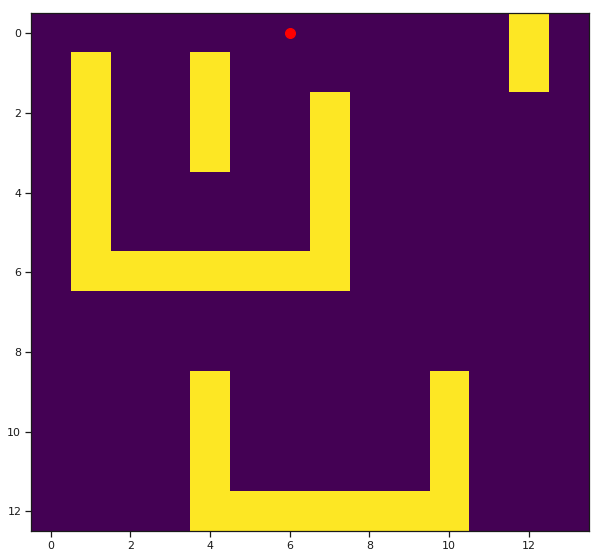

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(z)
ax.plot([6], [0], linestyle='none', marker='.', color='red', markersize=20);

In [11]:
# z, xmin, xmax, ymin, ymax = inp_str_to_map(load_data())

In [12]:
# fig, ax = plt.subplots(figsize=(15, 50))
# ax.imshow(z, aspect='auto');

#### function def

In [49]:
class AocError(Exception):
    pass

In [50]:
from copy import deepcopy

In [52]:
UP, RIGHT, DOWN, LEFT = 'UP', 'RIGHT', 'DOWN', 'LEFT'
delta_ij = {
    UP: (-1, 0),
    DOWN: (1, 0),
    LEFT: (0, -1),
    RIGHT: (0, 1),
}
EMPTY, WALL, WATER = 0, 1, 2

In [65]:
class Painter(object):
    """pixel painter"""
    def __init__(self, a, location=(0, 500), starting_direction=DOWN,
                 figsize=(10, 10)):
        self.a = a
        self.falling_points = {location,}
        self.spreading_points = {}
        self.direction = starting_direction
        self.figsize = figsize
        self.paint_history = []
        self.paint(location)
        self.edge_hits = 0
    
    def paint(self, location):
        LOGGER.debug('painting location {}'.format(location))
        self.a[location] = WATER
        self.paint_history.append(location)
    
    @property
    def done(self):
        # no falling or spreading points remain
        return self.falling_points.union(self.spreading_points) == set()
    
    def step(self):
        """take one step and paint the pixel you find there"""
        fp_iter = deepcopy(self.falling_points)  # so we can pop in iteration
        for falling_point in fp_iter:
            LOGGER.debug('falling point: {}'.format(falling_point))
            # see what is in the next chosen direction
            try:
                next_location = self._get_next_ij(
                    direction=DOWN, location=falling_point
                )
            except AocError:
                # this should only be possible if we are pouring off
                # the bottom of the map. this falling iter is done!
                LOGGER.debug('falling point reached the bottom of the screen')
                self.falling_points.remove(falling_point)
                continue
            
            # we hit walls when we are in a bucket
            if self.a[next_location] == WALL:
                LOGGER.debug('next step is not open')
                
                # we were flowing downward and landed in a bucket.
                # create two spreading points (both starting here, one heading)
                # left and one heading right
                self.spreading_points[falling_point] = {
                    direction: {
                        'location': falling_point,
                        'wall': False,
                        'fall': False,
                        'finished': False
                    }
                    for direction in [LEFT, RIGHT]
                }
                self.falling_points.remove(falling_point)
            elif self.a[next_location] == EMPTY:
                # move falling poing there and paint
                self.falling_points.remove(falling_point)
                self.falling_points.add(next_location)
                self.paint(next_location)
            else:
                msg = "haven't handled falling point next value of {} yet".format(
                    self.a[next_location]
                )
                LOGGER.error(msg)
                raise AocError(msg)
            
        spc = deepcopy(self.spreading_points)
        for (root, spreaddict) in spc.items():
            for direction in [LEFT, RIGHT]:
                if not spreaddict[direction]['finished']:
                    current_location = spreaddict[direction]['location']
                    LOGGER.debug('{}ward spreading point {}'.format(
                        'left' if direction == LEFT else 'right',
                        current_location
                    ))
                    # if the point below this item is empty, fall
                    # otherwise, try and continue in the current direction
                    if self._neighbor_empty(nbr_dir=DOWN, location=current_location):
                        LOGGER.debug('falling edge found')
                        LOGGER.debug('{}ward spread of {} is finished'.format(
                            'left' if direction == LEFT else 'right',
                            root
                        ))
                        for k in ['fall', 'finished']:
                            self.spreading_points[root][direction][k] = True
                        self.falling_points.add(current_location)
                        continue
                    else:
                        next_location = self._get_next_ij(
                            location=current_location,
                            direction=direction
                        )
                        
                        if self.a[next_location] == EMPTY:
                            self.paint(next_location)
                            self.spreading_points[root][direction]['location'] = next_location
                            continue
                        elif self.a[next_location] == WATER:
                            # just take a step, no need to paint
                            self.spreading_points[root][direction]['location'] = next_location
                        else:
                            LOGGER.debug('non-empty boundary found')
                            LOGGER.debug('{}ward spread of {} is finished'.format(
                                'left' if direction == LEFT else 'right',
                                root
                            ))
                            for k in ['wall', 'finished']:
                                self.spreading_points[root][direction][k] = True
                                
            # after pushing both edges, check now to see if we are done with both.
            # if both hit walls, iterate the root up one and start anew (we can 
            # keep flowing up)
            d = self.spreading_points[root]
            dl = d[LEFT]
            dr = d[RIGHT]
            if dl['finished'] and dr['finished']:
                if dl['wall'] and dr['wall']:
                    # for each walker, step up and move in the opposite direction
                    # until you find water. make that a first water spot a new 
                    # spread location
                    lft_loc = self._get_next_ij(location=dl['location'], direction=UP)
                    rgt_loc = self._get_next_ij(location=dr['location'], direction=UP)
                    
                    # iterate up and spread again. it's not as easy as moving up
                    # from the root point, because sometimes the entry to a bucket
                    # was spread-fall-spread-fill (bucket in a bucket scenario)
                    # so always scan the water line for an up spout
                    for up_point in self.scan_for_spouts(location=root):
                        if up_point not in self.spreading_points:
                            LOGGER.debug('adding up point {}'.format(up_point))
                            self.spreading_points[up_point] = {
                                direction: {
                                    'location': up_point,
                                    'wall': False,
                                    'fall': False,
                                    'finished': False
                                }
                                for direction in [LEFT, RIGHT]
                            }
                del self.spreading_points[root]
    
    def _get_next_ij(self, direction=None, location=None):
        if direction is None:
            direction = self.direction
        delta_i, delta_j = delta_ij[direction]
        i, j = location or self.location
        next_i = i + delta_i
        next_j = j + delta_j
        
        # bounds check
        if (0 <= next_i < self.a.shape[0]) and (0 <= next_j < self.a.shape[1]):
            return next_i, next_j
        else:
            raise AocError("next step out of bounds")
    
    def _neighbor_value(self, nbr_dir, location=None):
        # find the square to the left or right
        try:
            nbr_location = self._get_next_ij(direction=nbr_dir, location=location)
        except AocError:
            # this would walk off the page, so nbr is "not" empty
            return None
        
        return self.a[nbr_location]
    
    def _neighbor_empty(self, nbr_dir, location=None):
        if nbr_dir not in [LEFT, RIGHT, DOWN]:
            msg = "I didn't plan for this direction"
            LOGGER.error(msg)
            LOGGER.debug('current direction: {}'.format(nbr_dir))
            raise AocError(msg)
        
        nbr_val = self._neighbor_value(nbr_dir=nbr_dir, location=location)
        if nbr_val is None:
            return False
        else:
            return nbr_val == EMPTY
    
    def _scan(self, location, direction, char):
        """start at location, keep moving in direction until you find char"""
        if self.a[location] == char:
            return location
        
        scan_location = deepcopy(location)
        while True:
            scan_location = self._get_next_ij(
                direction=direction, location=scan_location
            )
            if self.a[scan_location] == char:
                return scan_location
            
    def scan_for_spouts(self, location):
        """given a starting location (assumed in a row of water), find the
        WALL boundaries of that location's row. then find any point of water
        in the line above that within that region
        
        """
        assert self.a[location] == WATER
        
        LOGGER.debug('scanning for spouts')
        spouts = set()
        
        # find boundaries of current line
        lft_wall = self._scan(location, LEFT, WALL)
        rgt_wall = self._scan(location, RIGHT, WALL)
        
        for j in range(lft_wall[1] + 1, rgt_wall[1]):
            up_location = location[0] - 1, j
            if self.a[up_location] == WATER:
                lft_val = self._neighbor_value(nbr_dir=LEFT, location=up_location)
                rgt_val = self._neighbor_value(nbr_dir=RIGHT, location=up_location)
                if (lft_val != WATER) and (rgt_val != WATER):
                    spouts.add(up_location)
        return spouts
        
    def show(self):
        fig, ax = plt.subplots(figsize=self.figsize)
        ax.imshow(self.a, cmap='Blues', aspect='auto')
        ij_pts = list(self.falling_points) + [
            spread_point['location']
            for root, spreaddict in self.spreading_points.items()
            for direction, spread_point in spreaddict.items()
            if not spread_point['finished']
        ]
        for (i, j) in ij_pts:
            ax.plot([j], [i], linestyle='none', marker='.', color='red', markersize=20)
            
        return ax
    
    @property
    def painted_spots(self):
        return (self.a == WATER).sum()

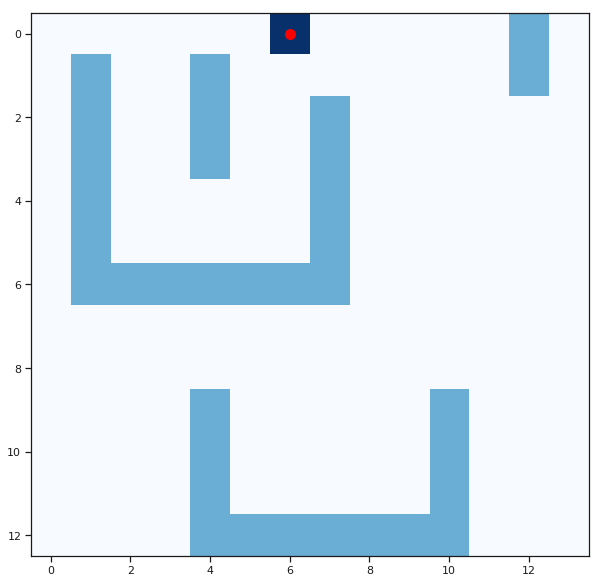

In [66]:
a, xmin, xmax, ymin, ymax = inp_str_to_map(test_data)
spigot_location = (0, 500 - xmin)

p = Painter(a=a, location=spigot_location)
p.show()

In [67]:
# p.step()
# p.show()
# print(p.edge_hits)
# assert not p.done

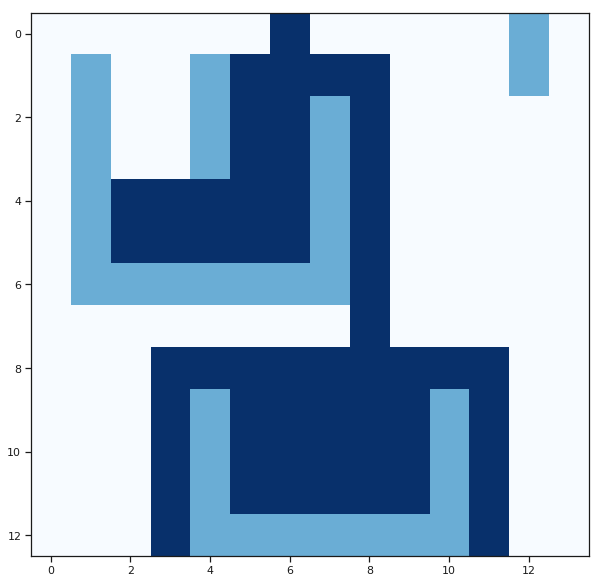

In [68]:
while not p.done:
    p.step()

p.show()

In [69]:
p.painted_spots

57

In [70]:
def q_1(data):
    a, xmin, xmax, ymin, ymax = inp_str_to_map(data)
    spigot_location = (0, 500 - xmin)

    p = Painter(a=a, location=spigot_location)
    
    while not p.done:
        p.step()
    
    p.show()
    
    return p.painted_spots

#### tests

In [71]:
def test_q_1():
    LOGGER.setLevel(logging.DEBUG)
    assert q_1(test_data) == 57
    LOGGER.setLevel(logging.INFO)

2018-12-31 18:40:55,044 DEBUG    [day17.paint:15] painting location (0, 6)
2018-12-31 18:40:55,046 DEBUG    [day17.step:28] falling point: (0, 6)
2018-12-31 18:40:55,048 DEBUG    [day17.paint:15] painting location (1, 6)
2018-12-31 18:40:55,051 DEBUG    [day17.step:28] falling point: (1, 6)
2018-12-31 18:40:55,052 DEBUG    [day17.paint:15] painting location (2, 6)
2018-12-31 18:40:55,055 DEBUG    [day17.step:28] falling point: (2, 6)
2018-12-31 18:40:55,056 DEBUG    [day17.paint:15] painting location (3, 6)
2018-12-31 18:40:55,059 DEBUG    [day17.step:28] falling point: (3, 6)
2018-12-31 18:40:55,061 DEBUG    [day17.paint:15] painting location (4, 6)
2018-12-31 18:40:55,063 DEBUG    [day17.step:28] falling point: (4, 6)
2018-12-31 18:40:55,065 DEBUG    [day17.paint:15] painting location (5, 6)
2018-12-31 18:40:55,067 DEBUG    [day17.step:28] falling point: (5, 6)
2018-12-31 18:40:55,069 DEBUG    [day17.step:43] next step is not open
2018-12-31 18:40:55,071 DEBUG    [day17.step:77] left

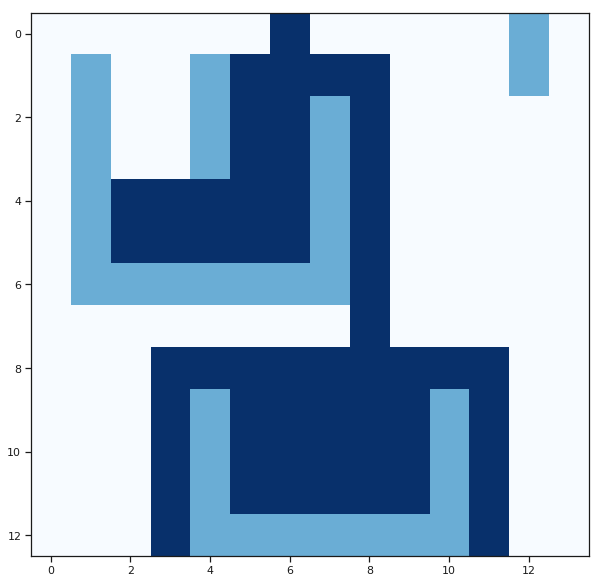

In [72]:
test_q_1()

#### answer

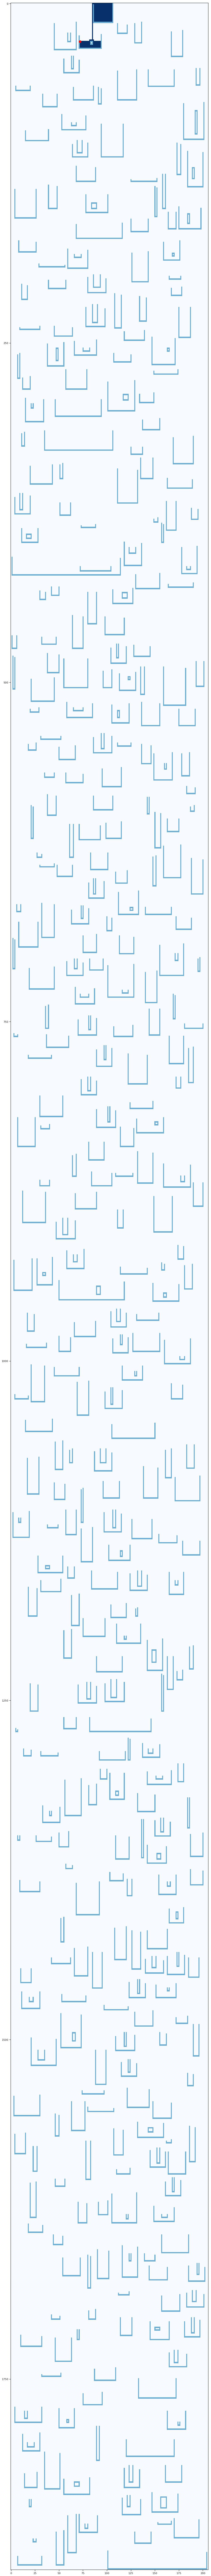

In [80]:
a, xmin, xmax, ymin, ymax = inp_str_to_map(load_data())
spigot_location = (0, 500 - xmin)

p = Painter(a=a, location=spigot_location, figsize=(15, 200))
# p.show();

# ---------

# i = 0
# while not p.done:
#     p.step()
#     i += 1
# p.show()

# ---------

for i in range(289):
    p.step()
p.show();

In [64]:
from pprint import pprint
pprint(p.spreading_points)

{(30, 82): {'LEFT': {'fall': False,
                     'finished': False,
                     'location': (30, 80),
                     'wall': False},
            'RIGHT': {'fall': False,
                      'finished': True,
                      'location': (30, 82),
                      'wall': True}},
 (30, 86): {'LEFT': {'fall': False,
                     'finished': True,
                     'location': (30, 86),
                     'wall': True},
            'RIGHT': {'fall': False,
                      'finished': False,
                      'location': (30, 88),
                      'wall': False}},
 (31, 86): {'LEFT': {'fall': False,
                     'finished': False,
                     'location': (31, 72),
                     'wall': False},
            'RIGHT': {'fall': False,
                      'finished': True,
                      'location': (31, 93),
                      'wall': True}}}


In [ ]:
pprint(p.falling_points)

In [ ]:
p.step??

In [ ]:
root = (32, 86)

In [ ]:
spc = deepcopy(p.spreading_points)
spreaddict = spc[root]

In [ ]:
direction = LEFT
spreaddict[direction]['finished']

In [ ]:
current_location = spreaddict[direction]['location']
current_location

In [ ]:
p._neighbor_empty(nbr_dir=DOWN, location=current_location)

In [ ]:
next_location = p._get_next_ij(location=current_location, direction=direction)
next_location

In [ ]:
p.a[next_location] == EMPTY

In [ ]:
p.a[next_location] == WATER

In [ ]:
p.a[next_location] == WALL

In [ ]:
for k in ['wall', 'finished']:
    p.spreading_points[root][direction][k] = True

In [ ]:
d = p.spreading_points[root]
d

In [ ]:
dl = d[LEFT]
dr = d[RIGHT]
dl['finished'] and dr['finished']

In [ ]:
dl['wall'] and dr['wall']

In [ ]:
up_points = list(p.scan_for_spouts(location=root))
up_points

In [ ]:
p.spreading_points

In [ ]:
p.step()
p.show();

In [ ]:
i = 0
while not p.done:
    i += 1
    p.step()

In [ ]:
p.show();

In [ ]:
i

In [ ]:
q_1(load_data())

## part 2

### problem statement:

#### function def

In [ ]:
def q_2(data):
    return False

#### tests

In [ ]:
def test_q_2():
    LOGGER.setLevel(logging.DEBUG)
    assert q_2(test_data) == True
    LOGGER.setLevel(logging.INFO)

In [ ]:
test_q_2()

#### answer

In [ ]:
q_2(load_data())

fin

In [81]:
import collections

clay = collections.defaultdict(bool)

for line in open('data/day17.txt').read().splitlines():
    a, brange = line.split(',')
    if a[0] == 'x':
        x = int(a.split('=')[1])
        y1, y2 = map(int, brange.split('=')[1].split('..'))

        for y in range(y1, y2 + 1):
            clay[(x, y)] = True
    else:
        y = int(a.split('=')[1])
        x1, x2 = map(int, brange.split('=')[1].split('..'))

        for x in range(x1, x2 + 1):
            clay[(x, y)] = True

ymin, ymax = min(clay, key=lambda p: p[1])[1], max(clay, key=lambda p: p[1])[1]

settled = set()
flowing = set()

def fill(pt, direction=(0, 1)):
    flowing.add(pt)

    below = (pt[0], pt[1] + 1)

    if not clay[below] and below not in flowing and 1 <= below[1] <= ymax:
        fill(below)

    if not clay[below] and below not in settled:
        return False

    left = (pt[0] - 1, pt[1])
    right = (pt[0] + 1, pt[1])

    left_filled = clay[left] or left not in flowing and fill(left, direction=(-1, 0))
    right_filled = clay[right] or right not in flowing and fill(right, direction=(1, 0))

    if direction == (0, 1) and left_filled and right_filled:
        settled.add(pt)

        while left in flowing:
            settled.add(left)
            left = (left[0] - 1, left[1])

        while right in flowing:
            settled.add(right)
            right = (right[0] + 1, right[1])

    return direction == (-1, 0) and (left_filled or clay[left]) or \
        direction == (1, 0) and (right_filled or clay[right])

fill((500, 0))

print('part 1:', len([pt for pt in flowing | settled if ymin <= pt[1] <= ymax]))
print('part 2:', len([pt for pt in settled if ymin <= pt[1] <= ymax]))

part 1: 31883
part 2: 24927
